- （1）导入NMIST数据集。
- （2）分析MNIST样本特点定义变量。
- （3）构建模型。
- （4）训练模型并输出中间状态参数。
- （5）测试模型。
- （6）保存模型。
- （7）读取模型。

## 1.导入NMIST数据集

In [2]:
import pylab
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

tf.reset_default_graph()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## 2.分析MNIST样本特点定义变量

In [3]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784])  # mnist data维度 28*28=784
y = tf.placeholder(tf.float32, [None, 10])  # 0-9 数字=> 10 classes

## 3.构建模型

In [4]:
# 定义学习参数
W = tf.Variable(tf.random_normal([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [5]:
# 定义输出节点
pred = tf.nn.softmax(tf.matmul(x, W) + b)  # Softmax分类

In [6]:
# 定义反向传播的结构

# 损失函数，交叉熵
# 等同于tf.softmax_cross_entropy_with_logits(logits, labels, name = None)
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
# 学习率
learning_rate = 0.01
# 使用梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## 4.训练模型并输出中间状态参数

In [7]:
# 整个训练样本集迭代25次
training_epochs = 25
# 一次取100条数据进行训练
batch_size = 100
# 每训练一次就把具体的中间状态显示出来
display_step = 1

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # Initializing OP

    # 启动循环开始训练
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # 遍历全部数据集
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # 运行优化器
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # 计算平均loss值
            avg_cost += c / total_batch
        
        # 显示训练中的详细信息
        if (epoch+1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(avg_cost))
    print(" Finished!")
    
    
# 5.测试模型
    
    # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval(
        {x: mnist.test.images, y: mnist.test.labels}))

    
# 6.保存模型
    # 创建saver
    saver = tf.train.Saver()
    # 创建保存路径
    model_path = "log/521model.ckpt"
    save_path = saver.save(sess, model_path)
    print("Model saved in file: %s" % save_path)

Epoch: 0001 cost= 8.733624019
Epoch: 0002 cost= 4.548955250
Epoch: 0003 cost= 3.091891566
Epoch: 0004 cost= 2.408790582
Epoch: 0005 cost= 2.017469868
Epoch: 0006 cost= 1.766134374
Epoch: 0007 cost= 1.590986501
Epoch: 0008 cost= 1.461794613
Epoch: 0009 cost= 1.362082972
Epoch: 0010 cost= 1.282387090
Epoch: 0011 cost= 1.217135234
Epoch: 0012 cost= 1.162327440
Epoch: 0013 cost= 1.115867527
Epoch: 0014 cost= 1.075725819
Epoch: 0015 cost= 1.040594859
Epoch: 0016 cost= 1.009462491
Epoch: 0017 cost= 0.981809966
Epoch: 0018 cost= 0.956902373
Epoch: 0019 cost= 0.934415015
Epoch: 0020 cost= 0.913846343
Epoch: 0021 cost= 0.895060736
Epoch: 0022 cost= 0.877698697
Epoch: 0023 cost= 0.861614855
Epoch: 0024 cost= 0.846762717
Epoch: 0025 cost= 0.832872507
 Finished!
Accuracy: 0.8347
Model saved in file: log/521model.ckpt


## 7.读取模型

Starting 2nd session...
INFO:tensorflow:Restoring parameters from log/521model.ckpt
Accuracy: 0.8347
[6 9] [[1.22711476e-11 2.16345518e-12 6.21929985e-07 4.14104201e-15
  2.38514950e-08 9.44084221e-13 9.99999404e-01 2.05491284e-11
  8.92980445e-09 3.15156399e-08]
 [9.50512412e-12 1.93728306e-06 1.31805052e-06 7.15214433e-03
  2.88576441e-04 1.77978333e-02 5.47279342e-08 1.31219225e-02
  8.52764919e-02 8.76359701e-01]] [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


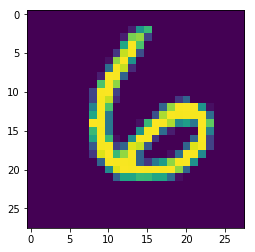

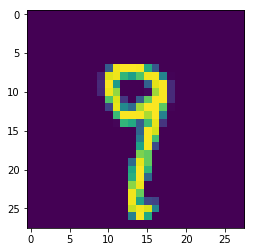

In [8]:
#读取模型
print("Starting 2nd session...")
with tf.Session() as sess:
    # 初始化变量
    sess.run(tf.global_variables_initializer())
    # 恢复模型变量
    saver.restore(sess, model_path)
    
     # 测试 model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print ("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    output = tf.argmax(pred, 1)
    batch_xs, batch_ys = mnist.train.next_batch(2)
    outputval,predv = sess.run([output,pred], feed_dict={x: batch_xs})
    print(outputval,predv,batch_ys)

    im = batch_xs[0]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()
    
    im = batch_xs[1]
    im = im.reshape(-1,28)
    pylab.imshow(im)
    pylab.show()